In [1]:
import numpy as np
import sys, os, git, lammps_logfile
import warnings
warnings.filterwarnings("ignore")

In [3]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
sys.path.append(git_path + "/files/shared-pyplot")
from plttools import PltTools
path_figures = git_path + "/figures/"

In [14]:
log = lammps_logfile.File("polymerize.log")
timestep = 0.001 # ps
time = log.get("Step")*timestep
Temp = log.get("Temp")
product1 = log.get("f_rxn[1]")
product2 = log.get("f_rxn[2]")
product3 = log.get("f_rxn[3]")

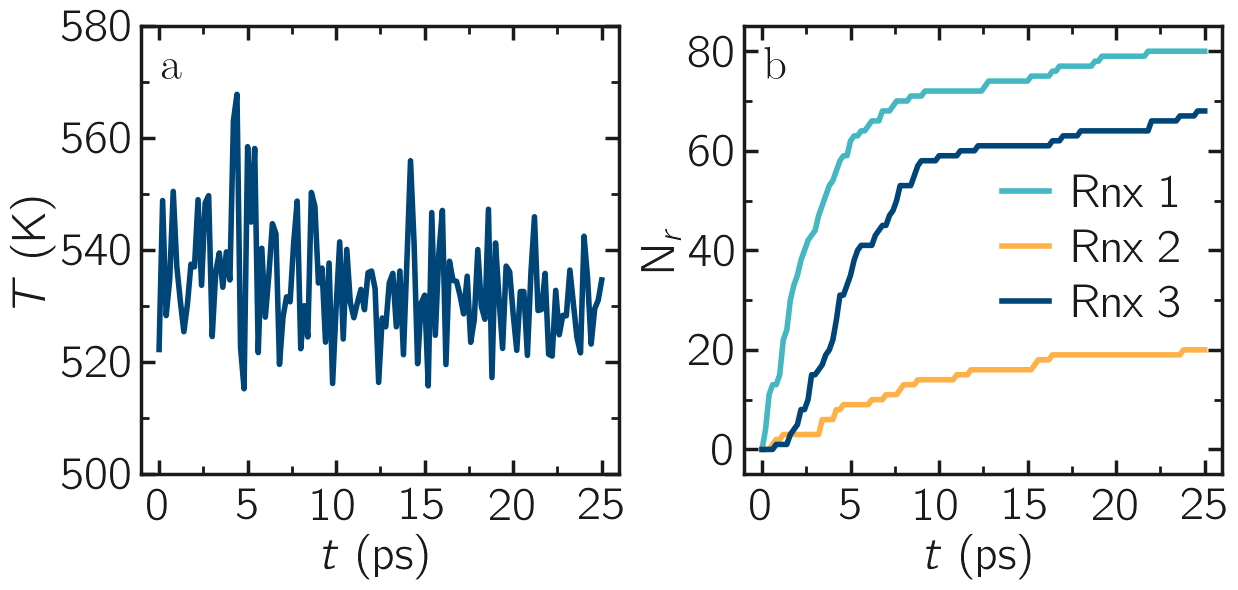

In [30]:
filename = "REACT-reacting"
myplt = PltTools()
myplt.prepare_figure(fig_size = (12.5,6.), dark_mode = False,
                    transparency = False, use_serif=False, n_colone=2)

myplt.add_panel()
myplt.add_plot(x = time, y =  Temp, type = "plot", linewidth_data = 3,
                marker = "-", data_color = 2, markersize = 12)
myplt.set_boundaries(x_boundaries=(-1, 26), # x_ticks=np.arange(0, 1800, 300)
                     y_boundaries=(500, 580), y_ticks=np.arange(500, 581, 20))
myplt.complete_panel(ylabel = r'$T ~ (\mathrm{K})$',
                     xlabel = r'$t ~ \mathrm{(ps)}$',
                     xpad = 10, legend=True, handlelength_legend=1)

myplt.add_panel()
myplt.add_plot(x = time, y =  product1, type = "plot", linewidth_data = 3,
                marker = "-", data_color = 0, markersize = 12, data_label = "Rnx 1")
myplt.add_plot(x = time, y =  product2, type = "plot", linewidth_data = 3,
                marker = "-", data_color = 1, markersize = 12, data_label = "Rnx 2")
myplt.add_plot(x = time, y =  product3, type = "plot", linewidth_data = 3,
                marker = "-", data_color = 2, markersize = 12, data_label = "Rnx 3")
                #data_label = r'$E_{12}$')
myplt.set_boundaries(x_boundaries=(-1, 26), # x_ticks=np.arange(0, 1800, 300)
                     y_boundaries=(-5, 85), y_ticks=np.arange(0, 81, 20))
myplt.complete_panel(ylabel = r'$\mathrm{N}_r$', xlabel = r'$t ~ \mathrm{(ps)}$',
                     xpad = 10, legend=True, handlelength_legend=1)
myplt.add_subplotlabels()
myplt.save_figure(filename = filename, saving_path = path_figures)